X·ª≠ l√Ω ·∫£nh: ./hinh.jpg


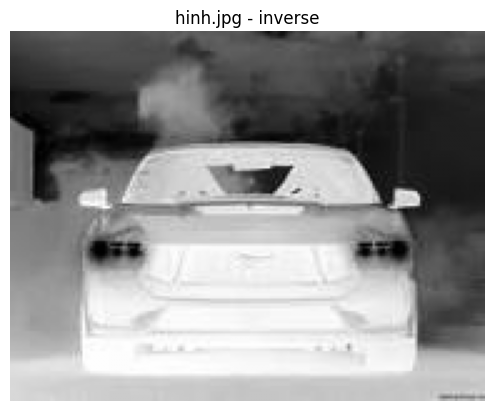

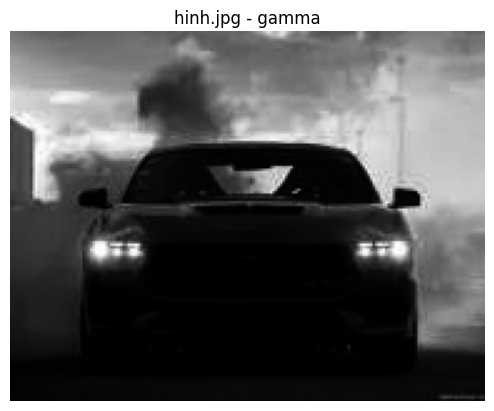

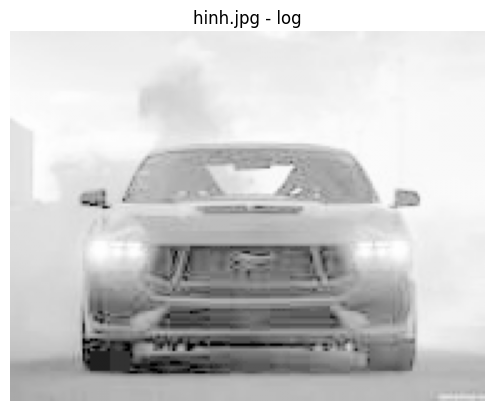

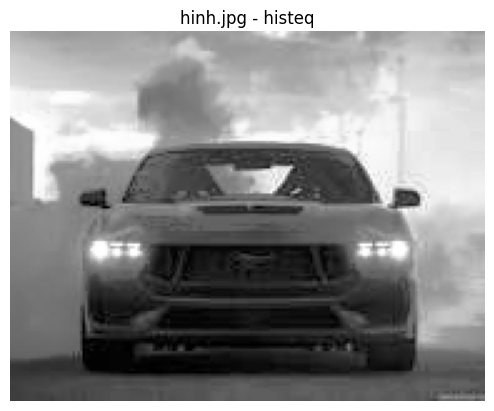

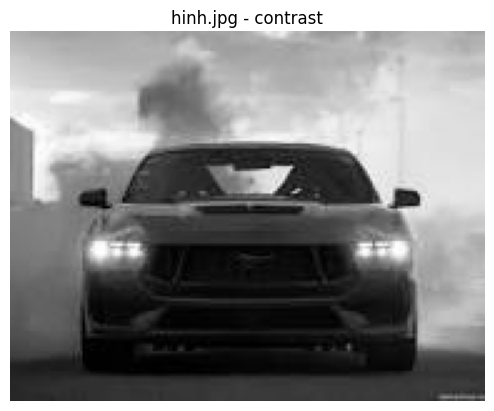

ƒê√£ x·ª≠ l√Ω xong t·∫•t c·∫£ c√°c ph∆∞∆°ng ph√°p v√† l∆∞u k·∫øt qu·∫£ v√†o th∆∞ m·ª•c ./output


In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

def image_inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.2):
    img_norm = img / 255.0
    img_gamma = np.power(img_norm, gamma)
    return np.uint8(img_gamma * 255)

def log_transformation(img):
    c = 255 / np.log(1 + np.max(img))
    img_log = c * np.log(1 + img)
    return np.uint8(img_log)

def histogram_equalization(img):
    return cv2.equalizeHist(img)

def contrast_stretching(img):
    a, b = np.min(img), np.max(img)
    stretched = (img - a) * (255 / (b - a))
    return np.uint8(stretched)

def process_and_save(img_path, func, suffix):
    img = Image.open(img_path).convert('L')  # ƒê·ªçc ·∫£nh v√† chuy·ªÉn sang x√°m
    img_np = np.array(img)
    img_trans = func(img_np)
    
    # T·∫°o th∆∞ m·ª•c output n·∫øu ch∆∞a c√≥
    out_folder = './output'
    if not os.path.exists(out_folder):
        os.makedirs(out_folder)
    
    # L∆∞u ·∫£nh k·∫øt qu·∫£
    out_path = os.path.join(out_folder, os.path.basename(img_path).replace('.jpg', f'_{suffix}.jpg'))
    Image.fromarray(img_trans).save(out_path)
    
    # Hi·ªÉn th·ªã ·∫£nh
    plt.imshow(img_trans, cmap='gray')
    plt.title(f"{os.path.basename(img_path)} - {suffix}")
    plt.axis('off')
    plt.show()

def main():
    img_path = './hinh.jpg'  # ƒê∆∞·ªùng d·∫´n file ·∫£nh, ch·ªânh ƒë√∫ng th∆∞ m·ª•c ch·ª©a file n·∫øu c·∫ßn

    if not os.path.exists(img_path):
        print("Kh√¥ng t√¨m th·∫•y ·∫£nh:", img_path)
        return

    print("X·ª≠ l√Ω ·∫£nh:", img_path)
    
    # G·ªçi l·∫ßn l∆∞·ª£t c√°c h√†m x·ª≠ l√Ω v√† l∆∞u k·∫øt qu·∫£
    process_and_save(img_path, image_inverse, 'inverse')
    process_and_save(img_path, lambda img: gamma_correction(img, 2.2), 'gamma')
    process_and_save(img_path, log_transformation, 'log')
    process_and_save(img_path, histogram_equalization, 'histeq')
    process_and_save(img_path, contrast_stretching, 'contrast')

    print("ƒê√£ x·ª≠ l√Ω xong t·∫•t c·∫£ c√°c ph∆∞∆°ng ph√°p v√† l∆∞u k·∫øt qu·∫£ v√†o th∆∞ m·ª•c ./output")

if __name__ == "__main__":
    main()

üîÑ ƒêang x·ª≠ l√Ω: exercise\hinh.jpg
ƒê√£ x·ª≠ l√Ω xong. K·∫øt qu·∫£ l∆∞u t·∫°i th∆∞ m·ª•c ./output



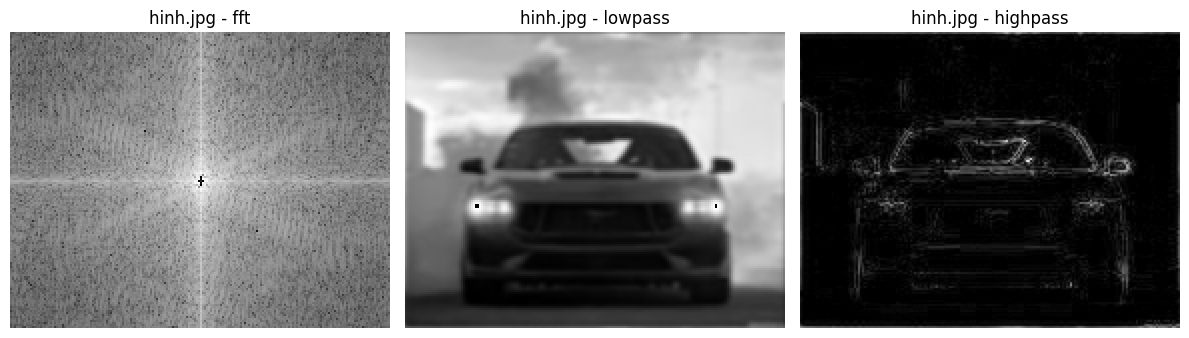

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def fast_fourier_transform(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # tr√°nh log(0)
    return np.uint8(magnitude_spectrum)

def butterworth_lowpass(img, d0=30, n=2):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow) ** 2 + (V - ccol) ** 2)
    H = 1 / (1 + (D / d0) ** (2 * n))
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift_filtered = fshift * H
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.abs(np.fft.ifft2(f_ishift))
    return np.uint8(img_back)

def butterworth_highpass(img, d0=30, n=2):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow) ** 2 + (V - ccol) ** 2)
    H = 1 / (1 + (d0 / (D + 1e-5)) ** (2 * n))  # c·ªông nh·ªè ƒë·ªÉ tr√°nh chia 0
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    fshift_filtered = fshift * H
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.abs(np.fft.ifft2(f_ishift))
    return np.uint8(img_back)

def process_and_collect(img_path, functions):
    img = Image.open(img_path).convert('L')
    img_np = np.array(img)

    results = []
    for func, suffix in functions:
        img_out = func(img_np)
        results.append((suffix, img_out))

        # L∆∞u ·∫£nh
        file_root, _ = os.path.splitext(os.path.basename(img_path))
        out_folder = 'output'
        os.makedirs(out_folder, exist_ok=True)
        out_path = os.path.join(out_folder, f"{file_root}_{suffix}.jpg")
        Image.fromarray(img_out).save(out_path)

    return os.path.basename(img_path), results

def main():
    folder = 'exercise'
    os.makedirs(folder, exist_ok=True)

    valid_exts = ('.jpg', '.jpeg', '.png')
    img_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith(valid_exts)]
    if not img_files:
        print("Kh√¥ng t√¨m th·∫•y ·∫£nh trong th∆∞ m·ª•c 'exercise'. H√£y th√™m ·∫£nh .jpg/.jpeg/.png v√† ch·∫°y l·∫°i.")
        return

    functions = [
        (fast_fourier_transform, 'fft'),
        (butterworth_lowpass, 'lowpass'),
        (butterworth_highpass, 'highpass')
    ]

    all_results = []
    for img_path in img_files:
        print("üîÑ ƒêang x·ª≠ l√Ω:", img_path)
        name, results = process_and_collect(img_path, functions)
        all_results.append((name, results))

    print("ƒê√£ x·ª≠ l√Ω xong. K·∫øt qu·∫£ l∆∞u t·∫°i th∆∞ m·ª•c ./output\n")

    # Hi·ªÉn th·ªã t·∫•t c·∫£ k·∫øt qu·∫£
    for name, results in all_results:
        plt.figure(figsize=(12, 4))
        for i, (suffix, img_result) in enumerate(results):
            plt.subplot(1, len(results), i + 1)
            plt.imshow(img_result, cmap='gray')
            plt.title(f"{name} - {suffix}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()

if __name__ == "__main__":
    main()

ƒêang x·ª≠ l√Ω: exercise\hinh.jpg


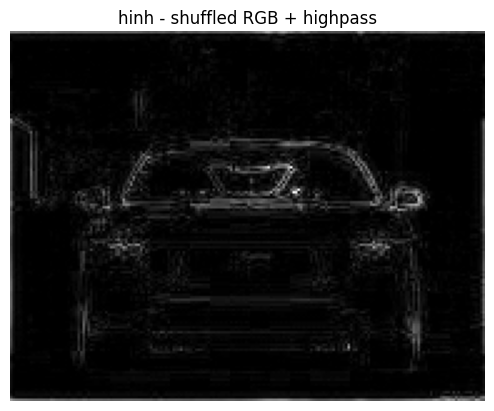

ƒê√£ x·ª≠ l√Ω xong t·∫•t c·∫£ ·∫£nh. K·∫øt qu·∫£ l∆∞u trong th∆∞ m·ª•c ./output


In [4]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# === C√°c ph√©p bi·∫øn ƒë·ªïi t·ª´ c√¢u 1 ===
def fast_fourier_transform(img_gray):
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)
    return np.uint8(magnitude_spectrum)

def butterworth_lowpass(img_gray, d0=30, n=2):
    rows, cols = img_gray.shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)
    H = 1 / (1 + (D / d0)**(2 * n))
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    fshift_filtered = fshift * H
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.abs(np.fft.ifft2(f_ishift))
    return np.uint8(img_back)

def butterworth_highpass(img_gray, d0=30, n=2):
    rows, cols = img_gray.shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)
    H = 1 / (1 + (d0 / (D + 1e-5))**(2 * n))
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    fshift_filtered = fshift * H
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.abs(np.fft.ifft2(f_ishift))
    return np.uint8(img_back)

# === Thay ƒë·ªïi th·ª© t·ª± k√™nh m√†u RGB ===
def shuffle_rgb(img_rgb):
    r, g, b = img_rgb.split()
    channels = [r, g, b]
    random.shuffle(channels)
    return Image.merge('RGB', channels)

def main():
    folder = 'exercise'
    os.makedirs(folder, exist_ok=True)

    valid_exts = ('.jpg', '.jpeg', '.png')
    img_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith(valid_exts)]
    if not img_files:
        print("Kh√¥ng t√¨m th·∫•y ·∫£nh trong th∆∞ m·ª•c 'exercise'. H√£y th√™m ·∫£nh .jpg/.jpeg/.png.")
        return

    transforms = [
        (fast_fourier_transform, 'fft'),
        (butterworth_lowpass, 'lowpass'),
        (butterworth_highpass, 'highpass')
    ]

    for img_path in img_files:
        print("ƒêang x·ª≠ l√Ω:", img_path)
        img = Image.open(img_path).convert('RGB')

        # 1. Thay ƒë·ªïi th·ª© t·ª± m√†u RGB ng·∫´u nhi√™n
        img_shuffled = shuffle_rgb(img)

        # 2. Chuy·ªÉn ·∫£nh v·ªÅ m·ª©c x√°m ƒë·ªÉ √°p d·ª•ng bi·∫øn ƒë·ªïi ·∫£nh
        img_gray = img_shuffled.convert('L')
        img_np = np.array(img_gray)

        # 3. Ch·ªçn ph√©p bi·∫øn ƒë·ªïi ng·∫´u nhi√™n t·ª´ c√¢u 1
        func, suffix = random.choice(transforms)
        img_result = func(img_np)

        # 4. L∆∞u k·∫øt qu·∫£
        out_folder = 'output'
        os.makedirs(out_folder, exist_ok=True)
        file_root, _ = os.path.splitext(os.path.basename(img_path))
        out_path = os.path.join(out_folder, f"{file_root}_shuffled_{suffix}.jpg")
        Image.fromarray(img_result).save(out_path)

        # 5. Hi·ªÉn th·ªã k·∫øt qu·∫£
        plt.imshow(img_result, cmap='gray')
        plt.title(f"{file_root} - shuffled RGB + {suffix}")
        plt.axis('off')
        plt.show()

    print("ƒê√£ x·ª≠ l√Ω xong t·∫•t c·∫£ ·∫£nh. K·∫øt qu·∫£ l∆∞u trong th∆∞ m·ª•c ./output")

if __name__ == "__main__":
    main()

ƒêang x·ª≠ l√Ω: exercise\hinh.jpg


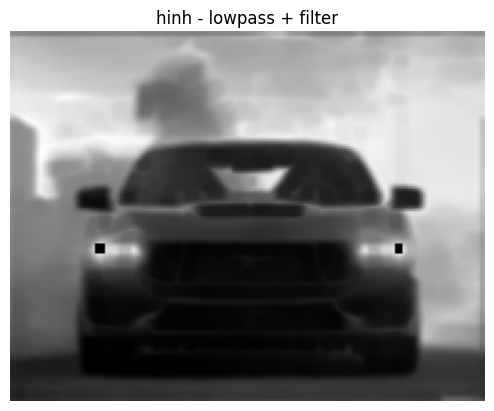

Ho√†n t·∫•t x·ª≠ l√Ω t·∫•t c·∫£ ·∫£nh. K·∫øt qu·∫£ l∆∞u trong th∆∞ m·ª•c ./output


In [5]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

# === C√°c ph√©p bi·∫øn ƒë·ªïi t·∫ßn s·ªë ===
def butterworth_lowpass(img_gray, d0=30, n=2):
    rows, cols = img_gray.shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)
    H = 1 / (1 + (D / d0)**(2 * n))
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    fshift_filtered = fshift * H
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.abs(np.fft.ifft2(f_ishift))
    return np.uint8(img_back)

def butterworth_highpass(img_gray, d0=30, n=2):
    rows, cols = img_gray.shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows)
    v = np.arange(cols)
    V, U = np.meshgrid(v, u)
    D = np.sqrt((U - crow)**2 + (V - ccol)**2)
    H = 1 / (1 + (d0 / (D + 1e-5))**(2 * n))  # +1e-5 ƒë·ªÉ tr√°nh chia 0
    f = np.fft.fft2(img_gray)
    fshift = np.fft.fftshift(f)
    fshift_filtered = fshift * H
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.abs(np.fft.ifft2(f_ishift))
    return np.uint8(img_back)

# === Thay ƒë·ªïi th·ª© t·ª± RGB ===
def shuffle_rgb(img_rgb):
    r, g, b = img_rgb.split()
    channels = [r, g, b]
    random.shuffle(channels)
    return Image.merge('RGB', channels)

# === Min & Max filter ===
def apply_min_filter(img_array):
    img = Image.fromarray(img_array)
    return np.array(img.filter(ImageFilter.MinFilter(size=3)))

def apply_max_filter(img_array):
    img = Image.fromarray(img_array)
    return np.array(img.filter(ImageFilter.MaxFilter(size=3)))

def main():
    folder = 'exercise'
    os.makedirs(folder, exist_ok=True)

    valid_exts = ('.jpg', '.jpeg', '.png')
    img_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith(valid_exts)]

    if not img_files:
        print("Kh√¥ng t√¨m th·∫•y ·∫£nh h·ª£p l·ªá trong th∆∞ m·ª•c 'exercise'.")
        return

    transforms = [
        (butterworth_lowpass, 'lowpass', apply_min_filter),
        (butterworth_highpass, 'highpass', apply_max_filter)
    ]

    for img_path in img_files:
        print("ƒêang x·ª≠ l√Ω:", img_path)
        img_rgb = Image.open(img_path).convert('RGB')

        # 1. ƒê·∫£o tr·ªôn k√™nh m√†u RGB
        img_shuffled = shuffle_rgb(img_rgb)

        # 2. Chuy·ªÉn sang ·∫£nh x√°m ƒë·ªÉ x·ª≠ l√Ω t·∫ßn s·ªë
        img_gray = img_shuffled.convert('L')
        img_np = np.array(img_gray)

        # 3. Ch·ªçn ph√©p bi·∫øn ƒë·ªïi v√† b·ªô l·ªçc ph√π h·ª£p
        freq_func, suffix, filter_func = random.choice(transforms)

        # 4. Bi·∫øn ƒë·ªïi t·∫ßn s·ªë
        freq_result = freq_func(img_np)

        # 5. √Åp d·ª•ng Min ho·∫∑c Max Filter
        filtered_result = filter_func(freq_result)

        # 6. L∆∞u ·∫£nh
        out_folder = 'output'
        os.makedirs(out_folder, exist_ok=True)
        file_root, _ = os.path.splitext(os.path.basename(img_path))
        out_path = os.path.join(out_folder, f"{file_root}_shuffled_{suffix}_filtered.jpg")
        Image.fromarray(filtered_result).save(out_path)

        # 7. Hi·ªÉn th·ªã ·∫£nh
        plt.imshow(filtered_result, cmap='gray')
        plt.title(f"{file_root} - {suffix} + filter")
        plt.axis('off')
        plt.show()

    print("Ho√†n t·∫•t x·ª≠ l√Ω t·∫•t c·∫£ ·∫£nh. K·∫øt qu·∫£ l∆∞u trong th∆∞ m·ª•c ./output")

if __name__ == "__main__":
    main()